In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [4]:
df = pd.read_csv('Boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


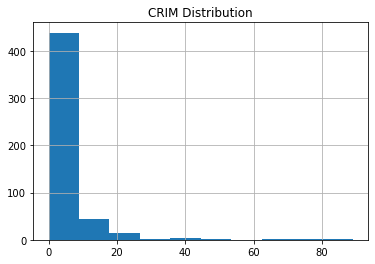

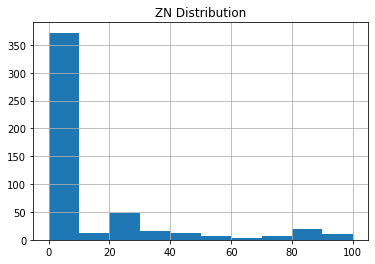

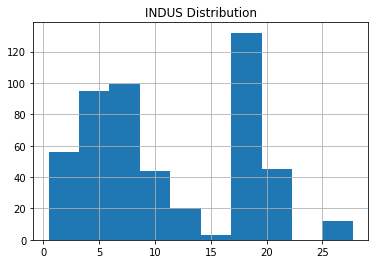

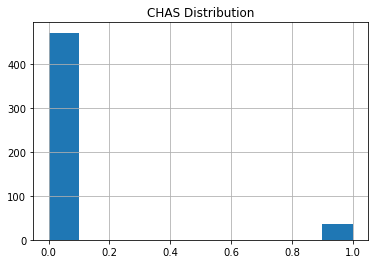

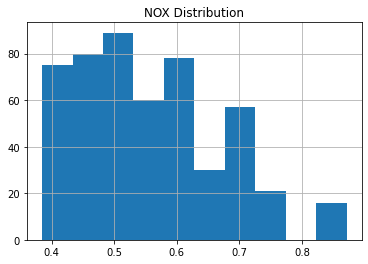

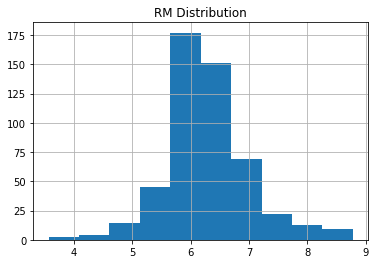

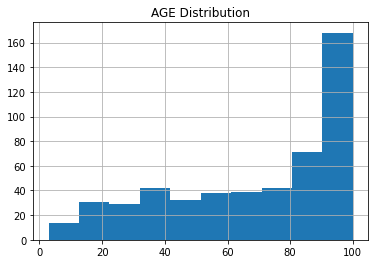

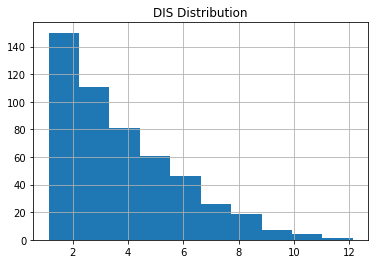

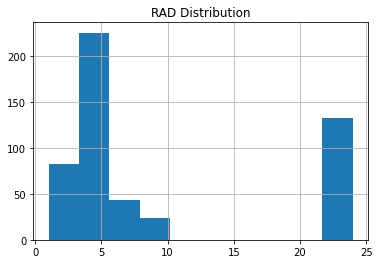

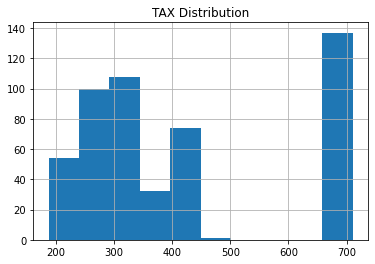

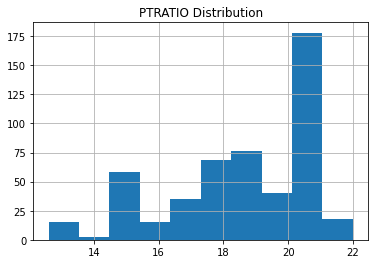

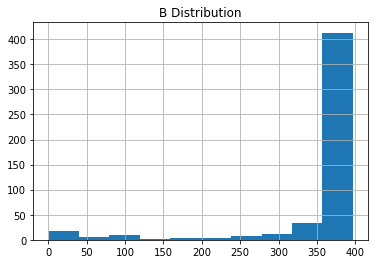

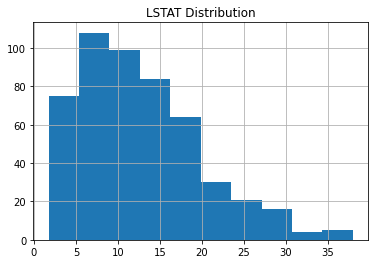

In [10]:
for col in df.columns[:-1]:

    df[col].hist(grid=True)
    plt.title(f"{col} Distribution")
    plt.show()

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


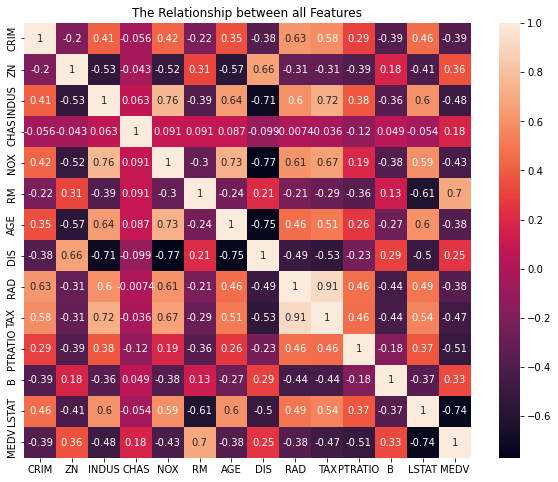

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.title("The Relationship between all Features")
plt.show()

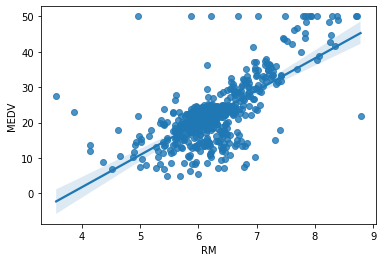

In [13]:
sns.regplot(x="RM", y="MEDV", data=df)
plt.show()

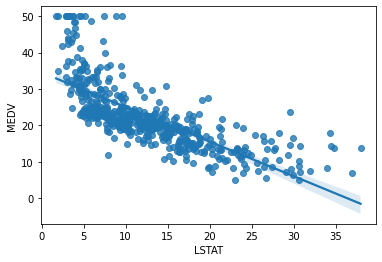

In [14]:
sns.regplot(x="LSTAT", y="MEDV", data=df)
plt.show()

In [15]:
# Independent Features
X = df.drop(columns=["MEDV"], axis=1)
# Target Feature
y = df[["MEDV"]]

In [16]:
X.shape

(506, 13)

In [17]:
y.shape

(506, 1)

In [19]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [20]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [21]:
# Train Data & Validation Data
X_train, X_val, y_train, y_Val = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
# let's define function to scale the input data without data leakage
def scaling_train_val(X_train, X_val):
    # define the scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    # scale the validation data by the x_train_transformer
    X_val_scaled = scaler.transform(X_val)

    return X_train_scaled, X_val_scaled

In [23]:
# scale the data
X_train, X_val = scaling_train_val(X_train, X_val)

In [24]:
# linear regression model
model = LinearRegression()
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# The weights of the model
model.coef_

array([[-1.10834602,  0.80843998,  0.34313466,  0.81386426, -1.79804295,
         2.913858  , -0.29893918, -2.94251148,  2.09419303, -1.44706731,
        -2.05232232,  1.02375187, -3.88579002]])

In [26]:
# The intercept
model.intercept_

array([23.01581921])

In [27]:
# Predict the input data
pred_train = model.predict(X_train)
# Predict the val data
pred_val = model.predict(X_val)

# let's check some metrics

print(
    f"The mean squared error on the trainig data is :{mean_squared_error(y_train, pred_train)}"
)
print(
    f"The mean squared error on the validation data is :{mean_squared_error(y_Val, pred_val)}"
)
print("--" * 20)

# let's check the score

print(f"The score on the training data: {r2_score(y_train, pred_train)}")
print(f"The score on the validation data: {r2_score(y_Val, pred_val)}")

The mean squared error on the trainig data is :22.545481487421426
The mean squared error on the validation data is :21.517444231177212
----------------------------------------
The score on the training data: 0.7434997532004697
The score on the validation data: 0.7112260057484932


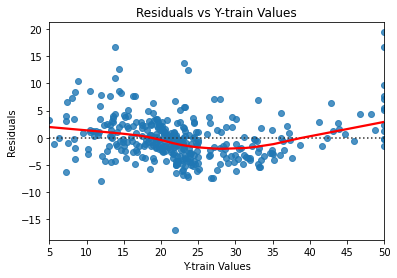

In [28]:
# Get Residuals on the training data
residuals_train = y_train - pred_train

# Homoscedasticity Assumption
# the residuals errors should have a constant variance
sns.residplot(x=y_train, y=residuals_train, lowess=True, line_kws={"color": "red"})
plt.xlabel("Y-train Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Y-train Values")
plt.show()

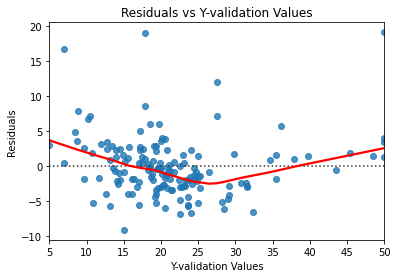

In [29]:
# Get Residuals on the validation data
residuals_val = y_Val - pred_val

# Homoscedasticity Assumption
# the residuals errors should have a constant variance
sns.residplot(x=y_Val, y=residuals_val, lowess=True, line_kws={"color": "red"})
plt.xlabel("Y-validation Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Y-validation Values")
plt.show()

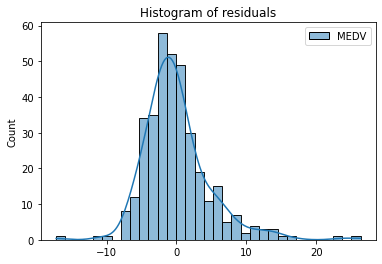

In [30]:
# Normality Assumption
# residual should be normally distributed
# Histogram of residuals
sns.histplot(residuals_train, kde=True, color="b")
plt.title("Histogram of residuals")
plt.show()

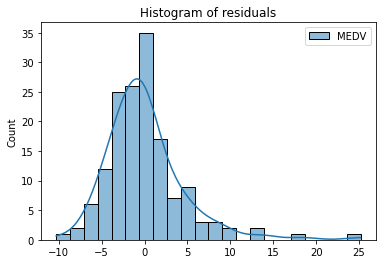

In [31]:
# Normality Assumption
# residual should be normally distributed
# Histogram of residuals
sns.histplot(residuals_val, kde=True)
plt.title("Histogram of residuals")
plt.show()

In [32]:
input_data = X_train[0].reshape((1, -1))
pred = model.predict(input_data)
pred[0][0]

25.28876410848213

In [33]:
import pickle

# save the model to disk
model_filename = "RegressionModel.pkl"
pickle.dump(model, open(model_filename, "wb"))

In [34]:
# load the model from the file system
loaded_model = pickle.load(open("RegressionModel.pkl", "rb"))

prediction = loaded_model.predict(input_data)
print("the prediction is :", prediction[0][0])

the prediction is : 25.28876410848213
